第一步：读取原始数据

In [1]:
import pandas as pd
import numpy as np


In [2]:
inputfile = "D:\\1_kaoyan\college_ending\\400仪表数据--全\middata - 副本\拉合闸最终.csv"


In [3]:
data_YuanLai = pd.read_csv(inputfile, encoding='utf-8')
data_YuanLai.head(5)


,meterNo,relayStatus_0c1o,relayUpdateTime
0,10014164400011,0,2017/4/11 20:56
1,10014164400011,1,2017/6/19 11:32
2,10014164400011,0,2017/6/19 11:45
3,10021160000828,0,2017/4/11 06:00
4,10021160000828,1,2017/5/1 17:00


In [4]:
data_YuanLai.tail(5)


,meterNo,relayStatus_0c1o,relayUpdateTime
24636,10023160000352,1,2020/4/8 22:38
24637,10023160000352,0,2020/4/8 23:30
24638,10023160000352,1,2020/7/4 13:29
24639,10023160000352,0,2020/7/4 18:30
24640,10023160000352,1,2020/10/16 09:36


In [5]:
data_YuanLai.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24641 entries, 0 to 24640
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   meterNo           24641 non-null  int64 
 1   relayStatus_0c1o  24641 non-null  int64 
 2   relayUpdateTime   24641 non-null  object
dtypes: int64(2), object(1)
memory usage: 577.6+ KB


第二步：增加新的序列

In [6]:
data_time = data_YuanLai.copy(deep=1)


In [7]:
data_time['new_relayUpdateTime'] = data_time['relayUpdateTime'].apply(
    pd.to_datetime)


In [8]:
data_time.head(5)


,meterNo,relayStatus_0c1o,relayUpdateTime,new_relayUpdateTime
0,10014164400011,0,2017/4/11 20:56,2017-04-11 20:56:00
1,10014164400011,1,2017/6/19 11:32,2017-06-19 11:32:00
2,10014164400011,0,2017/6/19 11:45,2017-06-19 11:45:00
3,10021160000828,0,2017/4/11 06:00,2017-04-11 06:00:00
4,10021160000828,1,2017/5/1 17:00,2017-05-01 17:00:00


In [9]:
data_time.tail(5)


,meterNo,relayStatus_0c1o,relayUpdateTime,new_relayUpdateTime
24636,10023160000352,1,2020/4/8 22:38,2020-04-08 22:38:00
24637,10023160000352,0,2020/4/8 23:30,2020-04-08 23:30:00
24638,10023160000352,1,2020/7/4 13:29,2020-07-04 13:29:00
24639,10023160000352,0,2020/7/4 18:30,2020-07-04 18:30:00
24640,10023160000352,1,2020/10/16 09:36,2020-10-16 09:36:00


In [10]:
data_time['relayStatus_0c1o'] = data_time['relayStatus_0c1o'].fillna(
    1).astype('int64')


In [11]:
data_time.tail(5)


,meterNo,relayStatus_0c1o,relayUpdateTime,new_relayUpdateTime
24636,10023160000352,1,2020/4/8 22:38,2020-04-08 22:38:00
24637,10023160000352,0,2020/4/8 23:30,2020-04-08 23:30:00
24638,10023160000352,1,2020/7/4 13:29,2020-07-04 13:29:00
24639,10023160000352,0,2020/7/4 18:30,2020-07-04 18:30:00
24640,10023160000352,1,2020/10/16 09:36,2020-10-16 09:36:00


In [12]:
data_time.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24641 entries, 0 to 24640
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   meterNo              24641 non-null  int64         
 1   relayStatus_0c1o     24641 non-null  int64         
 2   relayUpdateTime      24641 non-null  object        
 3   new_relayUpdateTime  24641 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 770.2+ KB


In [13]:
data_time['new_meterNo'] = data_time['meterNo'].shift(
    -1).fillna('10023160000352').astype('int64')


In [14]:
data_time['new_0c1o'] = data_time['relayStatus_0c1o'].shift(
    -1).fillna(1).astype('int64')


In [15]:
data_time['next_relayUpdateTime'] = data_time['new_relayUpdateTime'].shift(
    -1).fillna('2017-05-01 17:00:00').apply(pd.to_datetime)


In [16]:
data_time.head(5)


,meterNo,relayStatus_0c1o,relayUpdateTime,new_relayUpdateTime,new_meterNo,new_0c1o,next_relayUpdateTime
0,10014164400011,0,2017/4/11 20:56,2017-04-11 20:56:00,10014164400011,1,2017-06-19 11:32:00
1,10014164400011,1,2017/6/19 11:32,2017-06-19 11:32:00,10014164400011,0,2017-06-19 11:45:00
2,10014164400011,0,2017/6/19 11:45,2017-06-19 11:45:00,10021160000828,0,2017-04-11 06:00:00
3,10021160000828,0,2017/4/11 06:00,2017-04-11 06:00:00,10021160000828,1,2017-05-01 17:00:00
4,10021160000828,1,2017/5/1 17:00,2017-05-01 17:00:00,10021160000828,0,2017-05-01 17:30:00


In [17]:
data_time.tail(5)


,meterNo,relayStatus_0c1o,relayUpdateTime,new_relayUpdateTime,new_meterNo,new_0c1o,next_relayUpdateTime
24636,10023160000352,1,2020/4/8 22:38,2020-04-08 22:38:00,10023160000352,0,2020-04-08 23:30:00
24637,10023160000352,0,2020/4/8 23:30,2020-04-08 23:30:00,10023160000352,1,2020-07-04 13:29:00
24638,10023160000352,1,2020/7/4 13:29,2020-07-04 13:29:00,10023160000352,0,2020-07-04 18:30:00
24639,10023160000352,0,2020/7/4 18:30,2020-07-04 18:30:00,10023160000352,1,2020-10-16 09:36:00
24640,10023160000352,1,2020/10/16 09:36,2020-10-16 09:36:00,10023160000352,1,2017-05-01 17:00:00


第三步：开始计算时间戳

In [18]:
data_time_JiSuan = data_time.copy(deep=1)


In [19]:
data_time_JiSuan.head(5)


,meterNo,relayStatus_0c1o,relayUpdateTime,new_relayUpdateTime,new_meterNo,new_0c1o,next_relayUpdateTime
0,10014164400011,0,2017/4/11 20:56,2017-04-11 20:56:00,10014164400011,1,2017-06-19 11:32:00
1,10014164400011,1,2017/6/19 11:32,2017-06-19 11:32:00,10014164400011,0,2017-06-19 11:45:00
2,10014164400011,0,2017/6/19 11:45,2017-06-19 11:45:00,10021160000828,0,2017-04-11 06:00:00
3,10021160000828,0,2017/4/11 06:00,2017-04-11 06:00:00,10021160000828,1,2017-05-01 17:00:00
4,10021160000828,1,2017/5/1 17:00,2017-05-01 17:00:00,10021160000828,0,2017-05-01 17:30:00


In [20]:
data_time_JiSuan.tail(5)


,meterNo,relayStatus_0c1o,relayUpdateTime,new_relayUpdateTime,new_meterNo,new_0c1o,next_relayUpdateTime
24636,10023160000352,1,2020/4/8 22:38,2020-04-08 22:38:00,10023160000352,0,2020-04-08 23:30:00
24637,10023160000352,0,2020/4/8 23:30,2020-04-08 23:30:00,10023160000352,1,2020-07-04 13:29:00
24638,10023160000352,1,2020/7/4 13:29,2020-07-04 13:29:00,10023160000352,0,2020-07-04 18:30:00
24639,10023160000352,0,2020/7/4 18:30,2020-07-04 18:30:00,10023160000352,1,2020-10-16 09:36:00
24640,10023160000352,1,2020/10/16 09:36,2020-10-16 09:36:00,10023160000352,1,2017-05-01 17:00:00


In [21]:
data_time_JiSuan


,meterNo,relayStatus_0c1o,relayUpdateTime,new_relayUpdateTime,new_meterNo,new_0c1o,next_relayUpdateTime
0,10014164400011,0,2017/4/11 20:56,2017-04-11 20:56:00,10014164400011,1,2017-06-19 11:32:00
1,10014164400011,1,2017/6/19 11:32,2017-06-19 11:32:00,10014164400011,0,2017-06-19 11:45:00
2,10014164400011,0,2017/6/19 11:45,2017-06-19 11:45:00,10021160000828,0,2017-04-11 06:00:00
3,10021160000828,0,2017/4/11 06:00,2017-04-11 06:00:00,10021160000828,1,2017-05-01 17:00:00
4,10021160000828,1,2017/5/1 17:00,2017-05-01 17:00:00,10021160000828,0,2017-05-01 17:30:00
...,...,...,...,...,...,...,...
24636,10023160000352,1,2020/4/8 22:38,2020-04-08 22:38:00,10023160000352,0,2020-04-08 23:30:00
24637,10023160000352,0,2020/4/8 23:30,2020-04-08 23:30:00,10023160000352,1,2020-07-04 13:29:00
24638,10023160000352,1,2020/7/4 13:29,2020-07-04 13:29:00,10023160000352,0,2020-07-04 18:30:00
24639,10023160000352,0,2020/7/4 18:30,2020-07-04 18:30:00,10023160000352,1,2020-10-16 09:36:00


In [22]:
data_time_JiSuan['NoIf_time'] = data_time_JiSuan['next_relayUpdateTime'] - data_time_JiSuan['new_relayUpdateTime']


In [23]:
def timecompute(new_0c1o, relayStatus_0c1o, new_meterNo, meterNo, next_relayUpdateTime, new_relayUpdateTime):
    if meterNo == new_meterNo and new_0c1o == 1 and relayStatus_0c1o == 0:
        if_time = next_relayUpdateTime-new_relayUpdateTime
    else:
        if_time = 0
    return if_time


In [24]:
def time_JiSuan(data):
    new_0c1o=data['new_0c1o']
    relayStatus_0c1o=data['relayStatus_0c1o']
    new_meterNo=data['new_meterNo']
    meterNo=data['meterNo']
    next_relayUpdateTime=data['next_relayUpdateTime']
    new_relayUpdateTime=data['new_relayUpdateTime']
    if meterNo==new_meterNo and new_0c1o==0 and relayStatus_0c1o==1:
        if_time = next_relayUpdateTime-new_relayUpdateTime
    else:
        if_time = 0
    return if_time
    

In [25]:
data_time_JiSuan['If_Time'] = data_time_JiSuan.apply(time_JiSuan, axis=1)


In [26]:
data_time_JiSuan.head(5)


,meterNo,relayStatus_0c1o,relayUpdateTime,new_relayUpdateTime,new_meterNo,new_0c1o,next_relayUpdateTime,NoIf_time,If_Time
0,10014164400011,0,2017/4/11 20:56,2017-04-11 20:56:00,10014164400011,1,2017-06-19 11:32:00,68 days 14:36:00,0
1,10014164400011,1,2017/6/19 11:32,2017-06-19 11:32:00,10014164400011,0,2017-06-19 11:45:00,0 days 00:13:00,0 days 00:13:00
2,10014164400011,0,2017/6/19 11:45,2017-06-19 11:45:00,10021160000828,0,2017-04-11 06:00:00,-70 days +18:15:00,0
3,10021160000828,0,2017/4/11 06:00,2017-04-11 06:00:00,10021160000828,1,2017-05-01 17:00:00,20 days 11:00:00,0
4,10021160000828,1,2017/5/1 17:00,2017-05-01 17:00:00,10021160000828,0,2017-05-01 17:30:00,0 days 00:30:00,0 days 00:30:00


In [27]:
data_time_JiSuan.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24641 entries, 0 to 24640
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype          
---  ------                --------------  -----          
 0   meterNo               24641 non-null  int64          
 1   relayStatus_0c1o      24641 non-null  int64          
 2   relayUpdateTime       24641 non-null  object         
 3   new_relayUpdateTime   24641 non-null  datetime64[ns] 
 4   new_meterNo           24641 non-null  int64          
 5   new_0c1o              24641 non-null  int64          
 6   next_relayUpdateTime  24641 non-null  datetime64[ns] 
 7   NoIf_time             24641 non-null  timedelta64[ns]
 8   If_Time               24641 non-null  object         
dtypes: datetime64[ns](2), int64(4), object(2), timedelta64[ns](1)
memory usage: 1.7+ MB


In [28]:
from datetime import datetime


In [29]:
def shijianchuo(data):
    new_0c1o = data['new_0c1o']
    relayStatus_0c1o = data['relayStatus_0c1o']
    new_meterNo = data['new_meterNo']
    meterNo = data['meterNo']
    next_relayUpdateTime = data['next_relayUpdateTime']
    new_relayUpdateTime = data['new_relayUpdateTime']
    new_relayUpdateTime = int(datetime.timestamp(new_relayUpdateTime))
    next_relayUpdateTime = int(datetime.timestamp(next_relayUpdateTime))
    if meterNo == new_meterNo and new_0c1o == 0 and relayStatus_0c1o == 1:
        if_time = next_relayUpdateTime-new_relayUpdateTime
    else:
        if_time = 0
    return if_time


In [30]:
data_time_JiSuan['If_Time_chuo'] = data_time_JiSuan.apply(shijianchuo, axis=1)


In [31]:
data_time_JiSuan.head(5)


,meterNo,relayStatus_0c1o,relayUpdateTime,new_relayUpdateTime,new_meterNo,new_0c1o,next_relayUpdateTime,NoIf_time,If_Time,If_Time_chuo
0,10014164400011,0,2017/4/11 20:56,2017-04-11 20:56:00,10014164400011,1,2017-06-19 11:32:00,68 days 14:36:00,0,0
1,10014164400011,1,2017/6/19 11:32,2017-06-19 11:32:00,10014164400011,0,2017-06-19 11:45:00,0 days 00:13:00,0 days 00:13:00,780
2,10014164400011,0,2017/6/19 11:45,2017-06-19 11:45:00,10021160000828,0,2017-04-11 06:00:00,-70 days +18:15:00,0,0
3,10021160000828,0,2017/4/11 06:00,2017-04-11 06:00:00,10021160000828,1,2017-05-01 17:00:00,20 days 11:00:00,0,0
4,10021160000828,1,2017/5/1 17:00,2017-05-01 17:00:00,10021160000828,0,2017-05-01 17:30:00,0 days 00:30:00,0 days 00:30:00,1800


In [32]:
13*60


780

第四步：开始聚合

In [33]:
data_group = data_time_JiSuan.copy(deep=1)


In [34]:
datagroup_shijianchuo = data_group.groupby('new_meterNo', as_index=0).agg({'If_Time_chuo': 'sum'})


In [35]:
datagroup_shijianchuo.head(5)


,new_meterNo,If_Time_chuo
0,10014164400011,780
1,10021160000828,672000
2,10021160000829,3324720
3,10021160000831,4373220
4,10021160000832,3217260


把时间戳归一化

datagroup_shijianchuo['If_Time_chuo']=datagroup_shijianchuo.If_Time_chuo.apply(lambda x : (x-np.min(datagroup_shijianchuo.If_Time_chuo))/(np.max(datagroup_shijianchuo.If_Time_chuo) - np.min(datagroup_shijianchuo.If_Time_chuo))*600)

第五步：计算次数

In [36]:
data_cishu = data_time_JiSuan.copy(deep=1)


In [37]:
data_cishu = data_cishu[(data_cishu['relayStatus_0c1o'] == 1)].groupby(['meterNo'])['relayStatus_0c1o'].sum()


In [38]:
# data_cishu1 = data_cishu[(data_cishu['relayStatus_0c1o'] == 1)].groupby(['meterNo'])['relayStatus_0c1o'].count()

In [39]:
# data_cishu1

In [40]:
data_cishu.head(5)


meterNo
10014164400011     1
10021160000828     6
10021160000829    16
10021160000831    19
10021160000832    14
Name: relayStatus_0c1o, dtype: int64

In [41]:
type(data_cishu)


pandas.core.series.Series

第五步：2、把序列变成dataframe

In [42]:
data_lhz_cishu = {'new_meterNo': data_cishu.index,
                  'lhz_cishu': data_cishu.values}


In [43]:
data_lhz_cishu = pd.DataFrame(data_lhz_cishu)


第六步：把两个dataframe组合

In [44]:
data_lhz_cishu.head(5)


,new_meterNo,lhz_cishu
0,10014164400011,1
1,10021160000828,6
2,10021160000829,16
3,10021160000831,19
4,10021160000832,14


In [45]:
datagroup_shijianchuo.head(5)


,new_meterNo,If_Time_chuo
0,10014164400011,780
1,10021160000828,672000
2,10021160000829,3324720
3,10021160000831,4373220
4,10021160000832,3217260


In [46]:
data_fina = data_lhz_cishu.merge(datagroup_shijianchuo, how='inner', on='new_meterNo')


In [47]:
data_fina.head(5)


,new_meterNo,lhz_cishu,If_Time_chuo
0,10014164400011,1,780
1,10021160000828,6,672000
2,10021160000829,16,3324720
3,10021160000831,19,4373220
4,10021160000832,14,3217260


第七步：画图

In [48]:
import matplotlib.pyplot as plt


In [49]:
data_fina['mean_min'] = (data_fina['If_Time_chuo']/data_fina['lhz_cishu'])/60


标准化

np.min(data_fina.mean_min)

20220412修改

In [50]:
data_fina['mean_min_yuanshi']=data_fina.mean_min

In [51]:
data_fina['lhz_cishu_yuanshi']=data_fina.lhz_cishu

20220412修改

In [52]:
data_fina['mean_min']=data_fina.mean_min.apply(lambda x : (x-(np.min(data_fina.mean_min)))/(np.max(data_fina.mean_min) - np.min(data_fina.mean_min)))

In [53]:
data_fina.head(5)

,new_meterNo,lhz_cishu,If_Time_chuo,mean_min,mean_min_yuanshi,lhz_cishu_yuanshi
0,10014164400011,1,780,0.000000,13.000000,1
1,10021160000828,6,672000,0.011856,1866.666667,6
2,10021160000829,16,3324720,0.022069,3463.250000,16
3,10021160000831,19,4373220,0.024454,3836.157895,19
4,10021160000832,14,3217260,0.024415,3830.071429,14


In [54]:
data_fina.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 0 to 399
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   new_meterNo        400 non-null    int64  
 1   lhz_cishu          400 non-null    int64  
 2   If_Time_chuo       400 non-null    int64  
 3   mean_min           400 non-null    float64
 4   mean_min_yuanshi   400 non-null    float64
 5   lhz_cishu_yuanshi  400 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 21.9 KB


In [55]:
data_fina['lhz_cishu']=data_fina.lhz_cishu.apply(lambda x : (x-(np.min(data_fina.lhz_cishu)))/(np.max(data_fina.lhz_cishu) - np.min(data_fina.lhz_cishu)))

标准化

In [56]:
import matplotlib

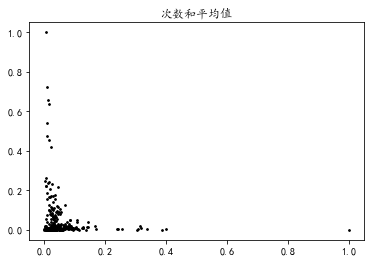

In [57]:
plt.title("次数和平均值")
matplotlib.rcParams['font.sans-serif'] = ['KaiTi']
plt.scatter(data_fina['lhz_cishu'], data_fina['mean_min'],
            color='k', s=3, label='Data points')


第八步：lof算法引进

In [58]:
lof_data = data_fina.copy(deep=1)


202204012


In [59]:
lof_data_new = data_fina.copy(deep=1)

In [60]:
lof_data_new.head(5)

,new_meterNo,lhz_cishu,If_Time_chuo,mean_min,mean_min_yuanshi,lhz_cishu_yuanshi
0,10014164400011,0.000000,780,0.000000,13.000000,1
1,10021160000828,0.007776,672000,0.011856,1866.666667,6
2,10021160000829,0.023328,3324720,0.022069,3463.250000,16
3,10021160000831,0.027994,4373220,0.024454,3836.157895,19
4,10021160000832,0.020218,3217260,0.024415,3830.071429,14


In [61]:
from sklearn.neighbors import LocalOutlierFactor


转换成为数组

In [62]:
X = np.array(lof_data)


In [63]:
type(X)


numpy.ndarray

In [64]:
Y = lof_data.values


In [65]:
Y


array([[1.00141644e+13, 0.00000000e+00, 7.80000000e+02, 0.00000000e+00,
        1.30000000e+01, 1.00000000e+00],
       [1.00211600e+13, 7.77604977e-03, 6.72000000e+05, 1.18564856e-02,
        1.86666667e+03, 6.00000000e+00],
       [1.00211600e+13, 2.33281493e-02, 3.32472000e+06, 2.20686060e-02,
        3.46325000e+03, 1.60000000e+01],
       ...,
       [1.00231600e+13, 1.27527216e-01, 1.16475000e+07, 1.48767153e-02,
        2.33885542e+03, 8.30000000e+01],
       [1.00231600e+13, 1.04199067e-01, 8.10294000e+06, 1.26198635e-02,
        1.98601471e+03, 6.80000000e+01],
       [1.00231600e+13, 4.19906687e-02, 2.35858200e+07, 8.97147188e-02,
        1.40391786e+04, 2.80000000e+01]])

In [66]:
Y.shape


(400, 6)

In [67]:
Y1 = Y[:, 1]


In [68]:
Y2 = Y[:, 3]


In [69]:
lof_data

,new_meterNo,lhz_cishu,If_Time_chuo,mean_min,mean_min_yuanshi,lhz_cishu_yuanshi
0,10014164400011,0.000000,780,0.000000,13.000000,1
1,10021160000828,0.007776,672000,0.011856,1866.666667,6
2,10021160000829,0.023328,3324720,0.022069,3463.250000,16
3,10021160000831,0.027994,4373220,0.024454,3836.157895,19
4,10021160000832,0.020218,3217260,0.024415,3830.071429,14
...,...,...,...,...,...,...
395,10023160000346,0.076205,8660640,0.018382,2886.880000,50
396,10023160000347,0.037325,599580,0.002474,399.720000,25
397,10023160000349,0.127527,11647500,0.014877,2338.855422,83
398,10023160000350,0.104199,8102940,0.012620,1986.014706,68


In [70]:
Y_pic = np.c_[Y1, Y2]


In [89]:
Y_pic


array([[0.00000000e+00, 0.00000000e+00],
       [7.77604977e-03, 1.18564856e-02],
       [2.33281493e-02, 2.20686060e-02],
       [2.79937792e-02, 2.44538121e-02],
       [2.02177294e-02, 2.44148817e-02],
       [4.82115086e-02, 2.45295570e-03],
       [2.95489891e-02, 4.65326016e-03],
       [7.77604977e-03, 3.06273000e-03],
       [2.48833593e-02, 4.69558818e-04],
       [3.42146190e-02, 1.59127175e-03],
       [2.48833593e-02, 9.02245229e-04],
       [2.48833593e-02, 3.20451318e-03],
       [4.97667185e-02, 2.52457414e-03],
       [4.19906687e-02, 1.14903773e-03],
       [3.57698289e-02, 9.97279469e-03],
       [3.42146190e-02, 1.77367010e-01],
       [9.02021773e-02, 2.31597872e-03],
       [1.86625194e-02, 3.30488485e-03],
       [6.06531882e-02, 2.76045464e-03],
       [2.95489891e-02, 7.87472336e-03],
       [1.08864697e-02, 3.48594747e-04],
       [6.22083981e-03, 1.04642387e-03],
       [2.48833593e-02, 7.42151257e-03],
       [1.71073095e-02, 2.28931872e-03],
       [3.265940

In [72]:
clf = LocalOutlierFactor(n_neighbors=100, contamination=0.05)


In [73]:
y_pred = clf.fit_predict(Y_pic)


In [74]:
y_pred

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [75]:
lof_values1=-clf._decision_function(Y_pic)

In [76]:
def plot_lof(result, method, group_str):
    import matplotlib.pyplot as plt
    plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
    plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
    plt.figure('local outlier factor %s' % group_str)
    try:
        plt.scatter(result[result > method].index,
                    result[result > method], c='red', s=50,
                    marker='.', alpha=None,
                    label='离群点')
    except Exception:
        pass
    try:
        plt.scatter(result[result <= method].index,
                    result[result <= method], c='black', s=50,
                    marker='.', alpha=None, label='正常点')
    except Exception:
        pass
    plt.hlines(method, -2, 2 + max(result.index), linestyles='--')
    plt.xlim(-2, 2 + max(result.index))
    plt.title('LOF局部离群点检测', fontsize=13)
    plt.ylabel('局部离群因子', fontsize=15)
    plt.legend()
    plt.show()

In [77]:
def plot_lof(result, method):
    import matplotlib.pyplot as plt
    plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
    plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
    plt.figure(figsize=(8, 4)).add_subplot(111)
    plt.scatter(result[result['local outlier factor'] > method].index,
                result[result['local outlier factor'] > method]['local outlier factor'], c='red', s=50,
                marker='.', alpha=None,
                label='离群点')
    plt.scatter(result[result['local outlier factor'] <= method].index,
                result[result['local outlier factor'] <= method]['local outlier factor'], c='black', s=50,
                marker='.', alpha=None, label='正常点')
    plt.hlines(method, -2, 2 + max(result.index), linestyles='--')
    plt.xlim(-2, 2 + max(result.index))
    plt.title('LOF局部离群点检测', fontsize=13)
    plt.ylabel('局部离群因子', fontsize=15)
    plt.legend()
    plt.show()

In [78]:
X_scores = clf.negative_outlier_factor_


In [79]:
X_scores


array([ -1.41565572,  -1.17996531,  -1.5108411 ,  -1.57851001,
        -1.63604657,  -1.16335202,  -0.97370308,  -1.1346111 ,
        -0.95113473,  -0.99600014,  -0.95094265,  -0.95405233,
        -1.18778784,  -1.08952549,  -1.01306794,  -3.49979961,
        -1.86924825,  -0.97416896,  -1.41686297,  -0.97564349,
        -1.08441197,  -1.17828416,  -0.96421748,  -0.99003854,
        -0.98695432,  -0.97248271,  -0.99369667,  -0.9523264 ,
        -1.2747727 ,  -1.22461625,  -1.02674729,  -1.11093319,
        -1.00309825,  -1.04591014,  -1.09323438,  -1.44189738,
        -0.96476795,  -0.96843154,  -3.62048018,  -0.95883224,
        -1.04718742,  -0.97413171,  -1.07624686,  -2.96963547,
        -1.04678976,  -1.40718924,  -2.61640465,  -3.90120837,
        -1.39490976,  -1.18740572,  -0.98966593,  -3.11506948,
        -0.98653462,  -0.96518121,  -1.10594894,  -0.97219759,
        -1.48267004,  -1.07544906,  -1.04474196,  -1.81485052,
        -1.01358114,  -1.66432526,  -1.03463442,  -1.01

In [80]:
Y_fina = np.c_[Y_pic, X_scores]


In [90]:
Y_fina

array([[ 0.        ,  0.        , -1.41565572],
       [ 0.00777605,  0.01185649, -1.17996531],
       [ 0.02332815,  0.02206861, -1.5108411 ],
       ...,
       [ 0.12752722,  0.01487672, -2.64884812],
       [ 0.10419907,  0.01261986, -2.11524133],
       [ 0.04199067,  0.08971472, -2.61687909]])

In [81]:
Y_all = np.c_[Y, X_scores]


In [82]:
Y_all.shape


(400, 7)

In [83]:
Y_fina.shape


(400, 3)

In [84]:
last_data = pd.DataFrame(Y_all)


In [85]:
last_data.head(5)


,0,1,2,3,4,5,6
0,1.001416e+13,0.000000,780.0,0.000000,13.000000,1.0,-1.415656
1,1.002116e+13,0.007776,672000.0,0.011856,1866.666667,6.0,-1.179965
2,1.002116e+13,0.023328,3324720.0,0.022069,3463.250000,16.0,-1.510841
3,1.002116e+13,0.027994,4373220.0,0.024454,3836.157895,19.0,-1.578510
4,1.002116e+13,0.020218,3217260.0,0.024415,3830.071429,14.0,-1.636047


In [ ]:
last_data.info()


第九步，处理最后数据

In [87]:
after_lof_data = last_data.copy(deep=1)


In [94]:
after_lof_data.columns = ['meterNo', 'times', 'all_s', 'aver', 'aver_shiji','times_shiji','score']


In [95]:
after_lof_data.head(5)


,meterNo,times,all_s,aver,aver_shiji,times_shiji,score
0,1.001416e+13,0.000000,780.0,0.000000,13.000000,1.0,-1.415656
1,1.002116e+13,0.007776,672000.0,0.011856,1866.666667,6.0,-1.179965
2,1.002116e+13,0.023328,3324720.0,0.022069,3463.250000,16.0,-1.510841
3,1.002116e+13,0.027994,4373220.0,0.024454,3836.157895,19.0,-1.578510
4,1.002116e+13,0.020218,3217260.0,0.024415,3830.071429,14.0,-1.636047


In [96]:
after_lof_data['meterNo'] = after_lof_data['meterNo'].astype('int64').astype('object')


In [97]:
after_lof_data['times'] = after_lof_data['times'].astype('float64')


In [98]:
after_lof_data['z_score'] = after_lof_data['score'].abs()


In [99]:
after_lof_data.head(5)

,meterNo,times,all_s,aver,aver_shiji,times_shiji,score,z_score
0,10014164400011,0.000000,780.0,0.000000,13.000000,1.0,-1.415656,1.415656
1,10021160000828,0.007776,672000.0,0.011856,1866.666667,6.0,-1.179965,1.179965
2,10021160000829,0.023328,3324720.0,0.022069,3463.250000,16.0,-1.510841,1.510841
3,10021160000831,0.027994,4373220.0,0.024454,3836.157895,19.0,-1.578510,1.578510
4,10021160000832,0.020218,3217260.0,0.024415,3830.071429,14.0,-1.636047,1.636047


In [100]:
after_lof_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   meterNo      400 non-null    object 
 1   times        400 non-null    float64
 2   all_s        400 non-null    float64
 3   aver         400 non-null    float64
 4   aver_shiji   400 non-null    float64
 5   times_shiji  400 non-null    float64
 6   score        400 non-null    float64
 7   z_score      400 non-null    float64
dtypes: float64(7), object(1)
memory usage: 25.1+ KB


排列

In [101]:
sort_after_lof_data = after_lof_data.copy(deep=1)


In [102]:
sort_after_lof_data.sort_values("z_score", inplace=True)


In [103]:
sort_after_lof_data.head(5)


,meterNo,times,all_s,aver,aver_shiji,times_shiji,score,z_score
352,10023160000268,0.023328,210120.0,0.001317,218.8750,16.0,-0.943486,0.943486
267,10023160000122,0.023328,89100.0,0.000510,92.8125,16.0,-0.943528,0.943528
102,10021160000959,0.023328,312240.0,0.001997,325.2500,16.0,-0.945474,0.945474
135,10021160001001,0.023328,327660.0,0.002100,341.3125,16.0,-0.945506,0.945506
133,10021160000999,0.023328,364260.0,0.002344,379.4375,16.0,-0.945579,0.945579


In [104]:
sort_after_lof_data.iloc[379, 5]


2.0

In [105]:
sort_after_lof_data.loc[sort_after_lof_data['z_score']
                        >= sort_after_lof_data.iloc[380, 5], 'class'] = 0
sort_after_lof_data.loc[sort_after_lof_data['z_score']
                        < sort_after_lof_data.iloc[380, 5], 'class'] = 1


In [106]:
sort_after_lof_data['times'][:379]


352    0.023328
267    0.023328
102    0.023328
135    0.023328
133    0.023328
         ...   
263    0.026439
148    0.006221
174    0.006221
286    0.010886
308    0.015552
Name: times, Length: 379, dtype: float64

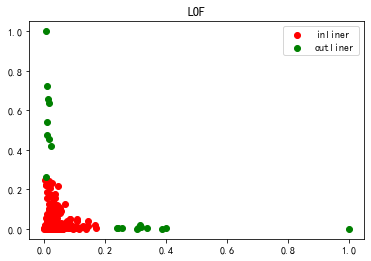

In [107]:
plt.title("LOF")
plt.scatter(sort_after_lof_data['times'][:380],
            sort_after_lof_data['aver'][:380], color='r', label="inliner")
plt.scatter(sort_after_lof_data['times'][380:],
            sort_after_lof_data['aver'][380:], color='g', label="outliner")
plt.legend()
plt.show()


In [108]:
sort_after_lof_data['times'][379:]

221    0.001555
316    0.006221
350    0.237947
385    0.242613
312    0.253499
272    0.020218
288    0.303266
384    0.307932
241    0.312597
329    0.318818
331    0.015552
179    0.007776
290    0.337481
246    0.009331
363    0.385692
359    0.399689
362    0.015552
212    0.010886
307    0.009331
232    0.006221
391    1.000000
Name: times, dtype: float64

In [109]:
sort_after_lof_data['aver'][379:]

221    0.249910
316    0.260751
350    0.002984
385    0.002339
312    0.002609
272    0.417790
288    0.001514
384    0.005585
241    0.022033
329    0.008553
331    0.454515
179    0.474711
290    0.003730
246    0.539662
363    0.001676
359    0.004164
362    0.638199
212    0.659326
307    0.722738
232    1.000000
391    0.000369
Name: aver, dtype: float64

In [110]:
sort_after_lof_data.tail(20)


,meterNo,times,all_s,aver,aver_shiji,times_shiji,score,z_score,class
316,10023160000201,0.006221,12233820.0,0.260751,40779.400000,5.0,-5.201677,5.201677,0.0
350,10023160000264,0.237947,4430100.0,0.002984,479.448052,154.0,-5.539933,5.539933,0.0
385,10023160000333,0.242613,3566760.0,0.002339,378.636943,157.0,-5.669503,5.669503,0.0
312,10023160000192,0.253499,4142100.0,0.002609,420.945122,164.0,-5.975583,5.975583,0.0
272,10023160000132,0.020218,54878100.0,0.417790,65331.071429,14.0,-7.295101,7.295101,0.0
288,10023160000150,0.303266,2935800.0,0.001514,249.642857,196.0,-7.387515,7.387515,0.0
384,10023160000332,0.307932,10580160.0,0.005585,886.110553,199.0,-7.517694,7.517694,0.0
241,10023160000079,0.312597,41907300.0,0.022033,3457.698020,202.0,-7.521754,7.521754,0.0
329,10023160000232,0.318818,16687560.0,0.008553,1350.126214,206.0,-7.830229,7.830229,0.0
331,10023160000234,0.015552,46908000.0,0.454515,71072.727273,11.0,-7.969065,7.969065,0.0
